In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm

In [2]:
data = pd.read_csv("data.csv", sep = ';').reset_index()
data

,level_0,level_1,level_2,level_3,level_4,Tabela 1
0,Country,Year,Inflaction Rate,Unemployment Rate,Interest Rate,Debt-to-GDP Ratio (Y)
1,Portugal,2000,2.6,4.5,4.8,48.4
2,Portugal,2001,3.6,4.6,4.7,51.1
3,Portugal,2002,3.4,5.7,4.0,53.7
4,Portugal,2003,3.0,6.6,2.6,55.7
...,...,...,...,...,...,...
88,Ireland,2018,0.7,5.8,-0.4,63.9
89,Ireland,2019,0.9,5.0,-0.4,57.0
90,Ireland,2020,0.5,7.0,-0.4,64.8
91,Ireland,2021,1.3,7.3,-0.4,70.1


In [3]:
data = data.drop(0)
data

,level_0,level_1,level_2,level_3,level_4,Tabela 1
1,Portugal,2000,2.6,4.5,4.8,48.4
2,Portugal,2001,3.6,4.6,4.7,51.1
3,Portugal,2002,3.4,5.7,4.0,53.7
4,Portugal,2003,3.0,6.6,2.6,55.7
5,Portugal,2004,2.5,6.7,2.2,57.5
...,...,...,...,...,...,...
88,Ireland,2018,0.7,5.8,-0.4,63.9
89,Ireland,2019,0.9,5.0,-0.4,57.0
90,Ireland,2020,0.5,7.0,-0.4,64.8
91,Ireland,2021,1.3,7.3,-0.4,70.1


In [4]:
data = data.rename(columns = {'level_0': 'country', 'level_1': 'years', 'level_2': 'inflation rate', 'level_3':
                              'unemployment rate', 'level_4': 'interest rate', 'Tabela 1': 'debt-to-gdp ratio'})
data

,country,years,inflation rate,unemployment rate,interest rate,debt-to-gdp ratio
1,Portugal,2000,2.6,4.5,4.8,48.4
2,Portugal,2001,3.6,4.6,4.7,51.1
3,Portugal,2002,3.4,5.7,4.0,53.7
4,Portugal,2003,3.0,6.6,2.6,55.7
5,Portugal,2004,2.5,6.7,2.2,57.5
...,...,...,...,...,...,...
88,Ireland,2018,0.7,5.8,-0.4,63.9
89,Ireland,2019,0.9,5.0,-0.4,57.0
90,Ireland,2020,0.5,7.0,-0.4,64.8
91,Ireland,2021,1.3,7.3,-0.4,70.1


In [5]:
data = data.sort_index()

groups = data.groupby('country')

data['previous inflation rate'] = groups['inflation rate'].shift(periods=1)
data['previous unemployment rate'] = groups['unemployment rate'].shift(periods=1)
data['previous interest rate'] = groups['interest rate'].shift(periods=1)

data

,country,years,inflation rate,unemployment rate,interest rate,debt-to-gdp ratio,previous inflation rate,previous unemployment rate,previous interest rate
1,Portugal,2000,2.6,4.5,4.8,48.4,NaN,NaN,NaN
2,Portugal,2001,3.6,4.6,4.7,51.1,2.6,4.5,4.8
3,Portugal,2002,3.4,5.7,4.0,53.7,3.6,4.6,4.7
4,Portugal,2003,3.0,6.6,2.6,55.7,3.4,5.7,4.0
5,Portugal,2004,2.5,6.7,2.2,57.5,3.0,6.6,2.6
...,...,...,...,...,...,...,...,...,...
88,Ireland,2018,0.7,5.8,-0.4,63.9,0.5,6.7,-0.4
89,Ireland,2019,0.9,5.0,-0.4,57.0,0.7,5.8,-0.4
90,Ireland,2020,0.5,7.0,-0.4,64.8,0.9,5.0,-0.4
91,Ireland,2021,1.3,7.3,-0.4,70.1,0.5,7.0,-0.4


In [6]:
column_order = ['country', 'years', 'inflation rate', 'previous inflation rate', 'unemployment rate', 'previous unemployment rate',
               'interest rate', 'previous interest rate', 'debt-to-gdp ratio']
data = data.reindex(columns = column_order)

data

,country,years,inflation rate,previous inflation rate,unemployment rate,previous unemployment rate,interest rate,previous interest rate,debt-to-gdp ratio
1,Portugal,2000,2.6,NaN,4.5,NaN,4.8,NaN,48.4
2,Portugal,2001,3.6,2.6,4.6,4.5,4.7,4.8,51.1
3,Portugal,2002,3.4,3.6,5.7,4.6,4.0,4.7,53.7
4,Portugal,2003,3.0,3.4,6.6,5.7,2.6,4.0,55.7
5,Portugal,2004,2.5,3.0,6.7,6.6,2.2,2.6,57.5
...,...,...,...,...,...,...,...,...,...
88,Ireland,2018,0.7,0.5,5.8,6.7,-0.4,-0.4,63.9
89,Ireland,2019,0.9,0.7,5.0,5.8,-0.4,-0.4,57.0
90,Ireland,2020,0.5,0.9,7.0,5.0,-0.4,-0.4,64.8
91,Ireland,2021,1.3,0.5,7.3,7.0,-0.4,-0.4,70.1


In [7]:
data.loc[1, 'previous inflation rate'] = '2.3'
data.loc[1, 'previous unemployment rate'] = '4.5'
data.loc[1, 'previous interest rate'] = '3.0'
data.loc[24, 'previous inflation rate'] = '2.6'
data.loc[24, 'previous unemployment rate'] = '11.1'
data.loc[24, 'previous interest rate'] = '10.9'
data.loc[47, 'previous inflation rate'] = '2.6'
data.loc[47, 'previous unemployment rate'] = '15.5'
data.loc[47, 'previous interest rate'] = '2.5'
data.loc[70, 'previous inflation rate'] = '5.1'
data.loc[70, 'previous unemployment rate'] = '6.2'
data.loc[70, 'previous interest rate'] = '3.5'
data

,country,years,inflation rate,previous inflation rate,unemployment rate,previous unemployment rate,interest rate,previous interest rate,debt-to-gdp ratio
1,Portugal,2000,2.6,2.3,4.5,4.5,4.8,3.0,48.4
2,Portugal,2001,3.6,2.6,4.6,4.5,4.7,4.8,51.1
3,Portugal,2002,3.4,3.6,5.7,4.6,4.0,4.7,53.7
4,Portugal,2003,3.0,3.4,6.6,5.7,2.6,4.0,55.7
5,Portugal,2004,2.5,3.0,6.7,6.6,2.2,2.6,57.5
...,...,...,...,...,...,...,...,...,...
88,Ireland,2018,0.7,0.5,5.8,6.7,-0.4,-0.4,63.9
89,Ireland,2019,0.9,0.7,5.0,5.8,-0.4,-0.4,57.0
90,Ireland,2020,0.5,0.9,7.0,5.0,-0.4,-0.4,64.8
91,Ireland,2021,1.3,0.5,7.3,7.0,-0.4,-0.4,70.1


In [8]:
if data.isnull().any().any():
    print("There are NaN values in the DataFrame.")
else:
    print("There are no NaN values in the DataFrame.")

There are no NaN values in the DataFrame.


In [9]:
data['inflation rate'] = data['inflation rate'].astype(float)
data['previous inflation rate'] = data['previous inflation rate'].astype(float)
data['unemployment rate'] = data['unemployment rate'].astype(float)
data['previous unemployment rate'] = data['previous unemployment rate'].astype(float)
data['interest rate'] = data['interest rate'].astype(float)
data['previous interest rate'] = data['previous interest rate'].astype(float)
data['debt-to-gdp ratio'] = data['debt-to-gdp ratio'].astype(float)
data.dtypes

country                        object
years                          object
inflation rate                float64
previous inflation rate       float64
unemployment rate             float64
previous unemployment rate    float64
interest rate                 float64
previous interest rate        float64
debt-to-gdp ratio             float64
dtype: object

/var/folders/tf/q1vv4fh9779_q3hd1m53_b5r0000gn/T/ipykernel_1086/903918576.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True, annot_kws={"fontsize":10})


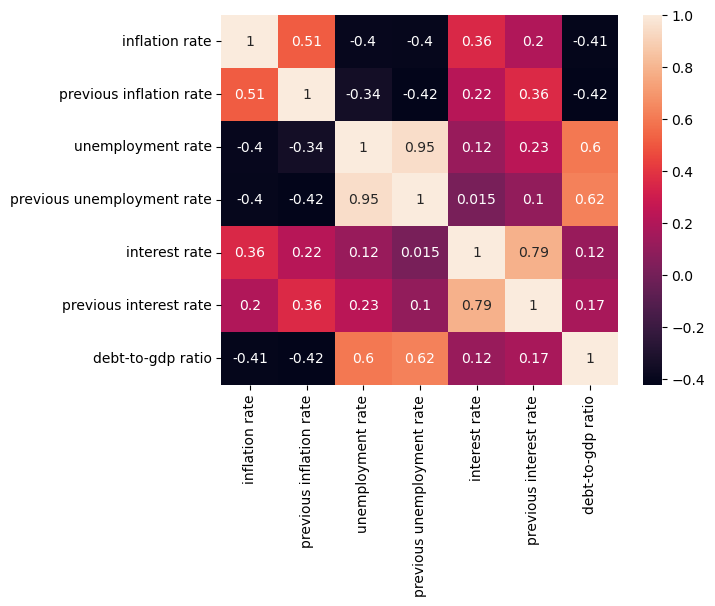

In [10]:
sns.heatmap(data.corr(),annot=True, annot_kws={"fontsize":10})
plt.show()

In [11]:
columns_outliers = ["interest rate","previous interest rate"]

def remove(data, columns_outliers):
    for col in columns_outliers:
        iqr = np.percentile(data[col],75) - np.percentile(data[col],25)
        upper_limit = np.percentile(data[col],75) + 1.5 * iqr
        data = data[data[col] < upper_limit]
    return data

data = remove(data,columns_outliers).reset_index()

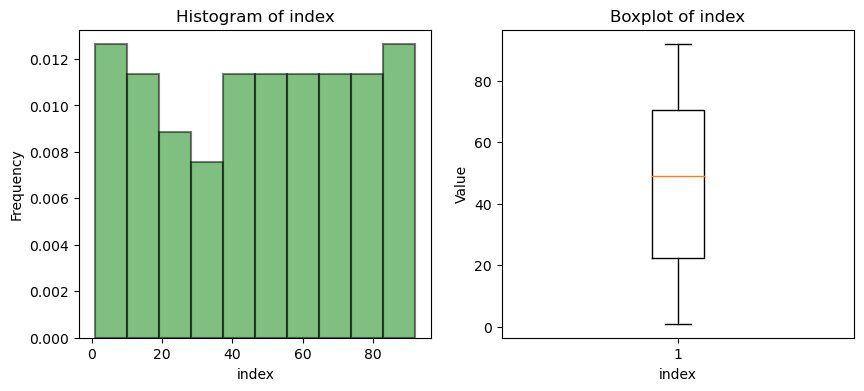

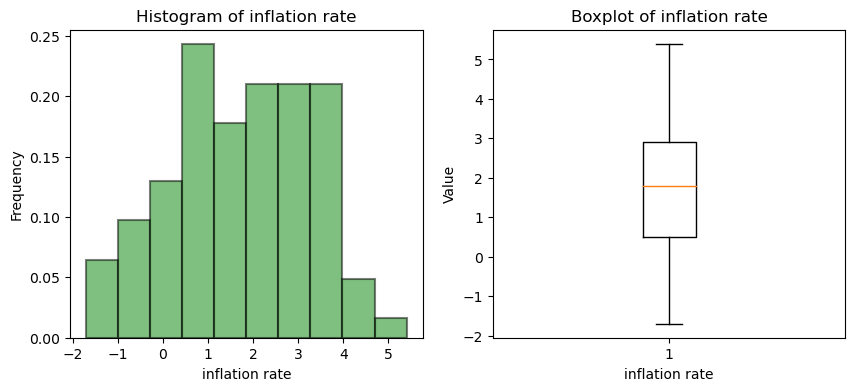

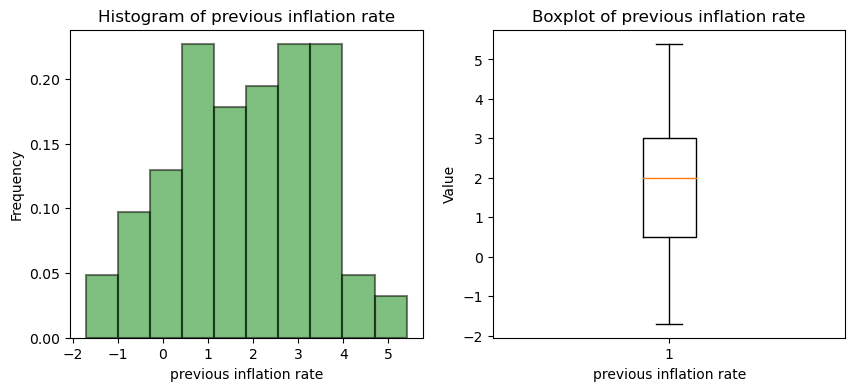

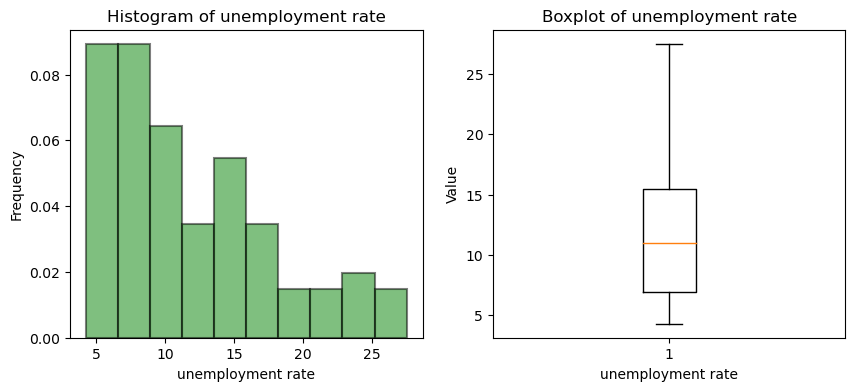

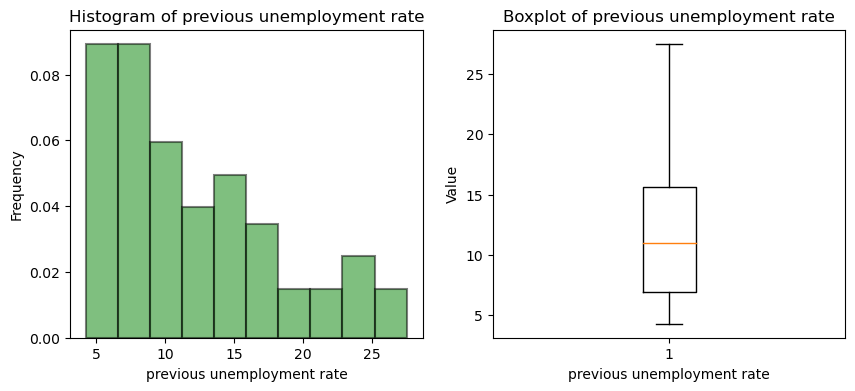

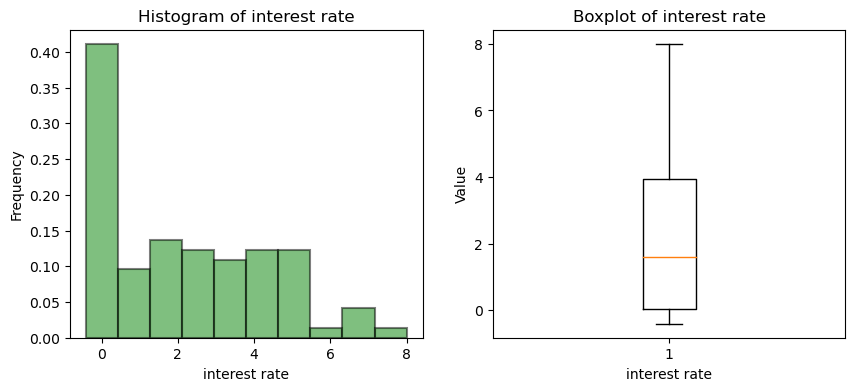

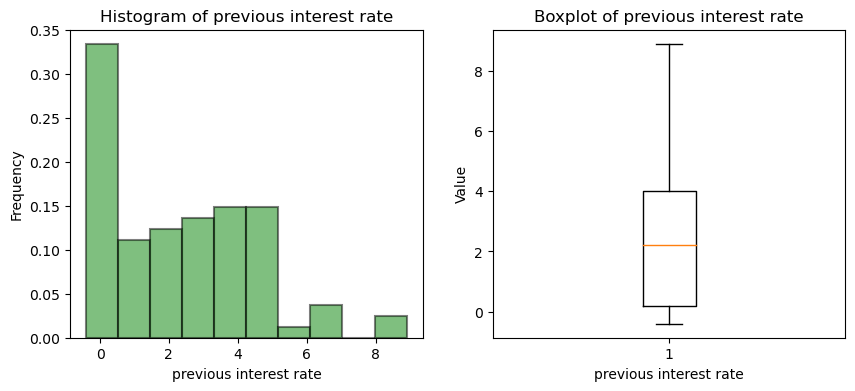

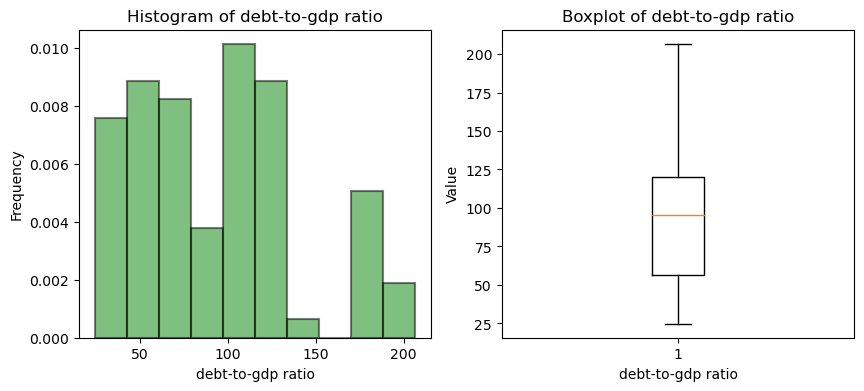

In [12]:
def plot_histboxplot(data):
    for col in data.columns:
        if data[col].dtype in ['int64', 'float64']:
            fig, ax = plt.subplots(1, 2, figsize=(10, 4))
            ax[0].hist(data[col], bins=10, color='green', density=True, alpha=0.5, edgecolor='black', linewidth=1.5, label='Histogram')
            ax[0].set_xlabel(col)
            ax[0].set_ylabel('Frequency')
            ax[0].set_title('Histogram of {}'.format(col))

            ax[1].boxplot(data[col])
            ax[1].set_xlabel(col)
            ax[1].set_ylabel('Value')
            ax[1].set_title('Boxplot of {}'.format(col))

            plt.show()
            
plot_histboxplot(data)

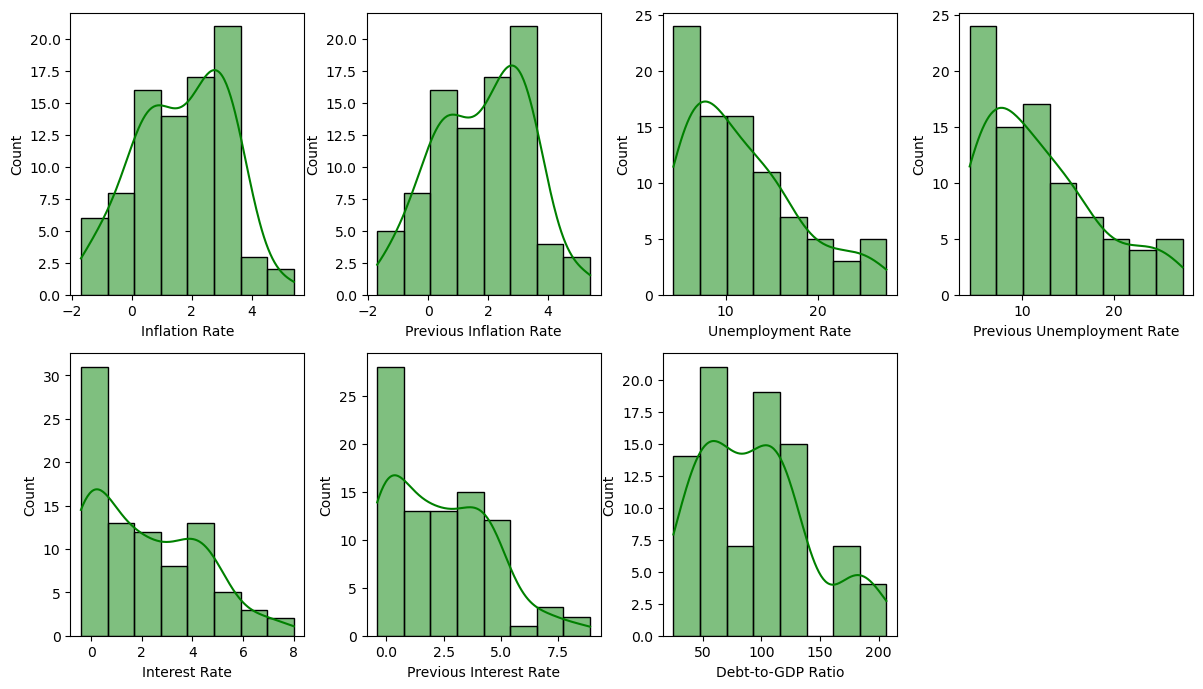

In [13]:
fig, axis = plt.subplots(2, 4, figsize=(12, 7))

sns.histplot(data['inflation rate'].values, kde=True,color='green', ax=axis[0, 0]).set_xlabel('Inflation Rate')
sns.histplot(data['previous inflation rate'].values, kde=True,color='green', ax=axis[0, 1]).set_xlabel('Previous Inflation Rate')
sns.histplot(data['unemployment rate'].values, kde=True,color='green', ax=axis[0, 2]).set_xlabel('Unemployment Rate')
sns.histplot(data['previous unemployment rate'].values, kde=True,color='green', ax=axis[0, 3]).set_xlabel('Previous Unemployment Rate')
sns.histplot(data['interest rate'].values, kde=True,color='green', ax=axis[1, 0]).set_xlabel('Interest Rate')
sns.histplot(data['previous interest rate'].values, kde=True,color='green', ax=axis[1, 1]).set_xlabel('Previous Interest Rate')
sns.histplot(data['debt-to-gdp ratio'].values, kde=True,color='green', ax=axis[1, 2]).set_xlabel('Debt-to-GDP Ratio')
axis[1, 3].axis('off')

plt.tight_layout()

In [14]:
np.log(data['interest rate'])

/Users/pedro/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pedro/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0     1.568616
1     1.547563
2     1.386294
3     0.955511
4     0.788457
        ...   
82         NaN
83         NaN
84         NaN
85         NaN
86         NaN
Name: interest rate, Length: 87, dtype: float64

In [15]:
len(data[data['interest rate'] < 0])

13

In [16]:
data['interest rate'] = np.where(data['interest rate'] < 0, 0, data['interest rate'])

In [17]:
data['interest rate'].replace(0, data['interest rate'].mean(), inplace=True)

In [18]:
arr, lmbda = stats.boxcox(data['interest rate'])

In [19]:
stats.boxcox(data['interest rate'])

(array([ 2.5497218 ,  2.49804814,  2.12235424,  1.27431528,  0.9980941 ,
         1.20705581,  2.00999554,  2.34016006,  2.28652379,  1.34048715,
         0.9980941 ,  0.77665417,  0.53981128,  0.19224393, -0.20939214,
        -1.04889591,  0.98325093,  0.98325093, -1.04889591,  0.98325093,
         0.98325093,  0.98325093,  0.98325093,  2.12235424,  2.12235424,
         2.60094127,  2.60094127,  2.60094127,  2.60094127,  2.60094127,
         1.77746892,  3.45767467,  3.45767467,  3.13773265,  3.59042474,
         4.01641964, -0.71187967,  0.19224393,  0.98325093, -1.27493127,
        -1.27493127,  2.49804814,  2.44590646,  1.9528775 ,  1.20705581,
         0.85201267,  1.59536729,  2.06648012,  2.17763953,  2.17763953,
         0.28323655,  0.37130768,  0.37130768,  0.53981128,  0.19224393,
        -0.86822685, -1.04889591,  0.98325093,  0.98325093,  0.98325093,
         0.98325093,  0.98325093,  0.98325093,  0.98325093,  2.49804814,
         1.65686539,  1.34048715,  0.85201267,  0.9

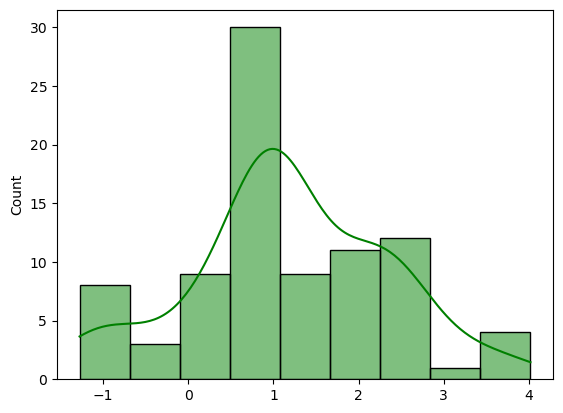

In [20]:
sns.histplot(arr, kde=True, color='green')
plt.show()

In [21]:
np.log(data['previous interest rate'])

/Users/pedro/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pedro/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0     1.098612
1     1.568616
2     1.547563
3     1.386294
4     0.955511
        ...   
82         NaN
83         NaN
84         NaN
85         NaN
86         NaN
Name: previous interest rate, Length: 87, dtype: float64

In [22]:
len(data[data['previous interest rate'] < 0])

11

In [23]:
data['previous interest rate'] = np.where(data['previous interest rate'] < 0, 0, data['previous interest rate'])

In [24]:
data['previous interest rate'].replace(0, data['previous interest rate'].mean(), inplace=True)

In [25]:
arr, lmbda = stats.boxcox(data['previous interest rate'])

In [26]:
stats.boxcox(data['previous interest rate'])

(array([ 1.52783168,  2.53691814,  2.48569271,  2.11307036,  1.27060717,
         0.99573154,  1.20369879,  2.00156332,  2.32913628,  2.27593911,
         1.33641948,  0.99573154,  0.77517659,  0.53907065,  0.19214426,
        -0.20952002, -1.05290725,  1.12931142,  1.12931142, -1.05290725,
         1.12931142,  1.12931142,  1.12931142,  2.11307036,  2.11307036,
         2.11307036,  2.5876874 ,  2.5876874 ,  2.5876874 ,  2.5876874 ,
         2.5876874 ,  4.34875332,  3.43607681,  3.43607681,  3.1194229 ,
         3.56740633,  3.98863202, -0.71354627,  0.19214426,  1.12931142,
        -1.28139906,  1.20369879,  2.48569271,  2.43399717,  1.94486584,
         1.20369879,  0.85025431,  1.58978883,  2.05762375,  2.16792496,
         2.16792496,  0.28302367,  0.37094735,  0.37094735,  0.53907065,
         0.19214426, -0.87081951, -1.05290725,  1.12931142,  1.12931142,
         1.12931142,  1.12931142,  1.12931142,  1.12931142,  1.82945902,
         2.48569271,  1.65089367,  1.33641948,  0.8

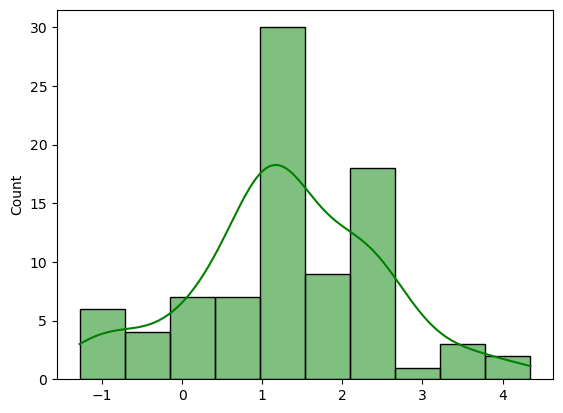

In [27]:
sns.histplot(arr, kde=True, color='green')
plt.show()

<Axes: ylabel='Count'>

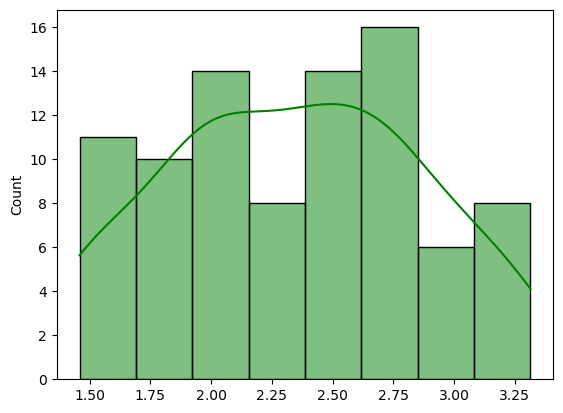

In [28]:
unemployment_rates = data['unemployment rate'].values
unemployment_rates_log = np.log(unemployment_rates)

sns.histplot(unemployment_rates_log, kde=True, color='green')

<Axes: ylabel='Count'>

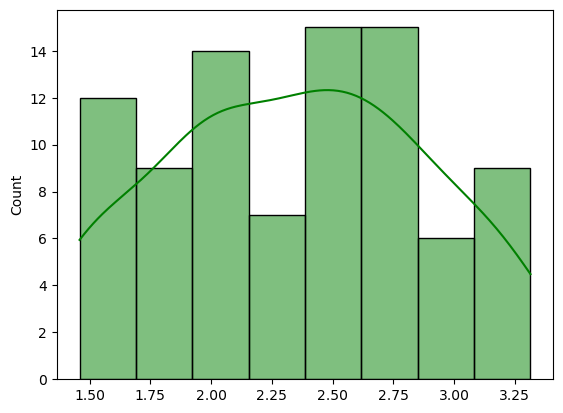

In [29]:
previous_unemployment_rates = data['previous unemployment rate'].values
previous_unemployment_rates_log = np.log(previous_unemployment_rates)

sns.histplot(previous_unemployment_rates_log, kde=True, color = 'green')

In [52]:
data = data.to_csv('data_clean.csv', index=False)

In [30]:
numerical = data._get_numeric_data()
numerical.columns

Index(['index', 'inflation rate', 'previous inflation rate',
       'unemployment rate', 'previous unemployment rate', 'interest rate',
       'previous interest rate', 'debt-to-gdp ratio'],
      dtype='object')

In [31]:
numerical_x = data.drop(['debt-to-gdp ratio', 'index', 'country', 'years'],axis=1)
numerical_x.columns

Index(['inflation rate', 'previous inflation rate', 'unemployment rate',
       'previous unemployment rate', 'interest rate',
       'previous interest rate'],
      dtype='object')

In [32]:
categorical_x = data.select_dtypes(include='object')
categorical_x.columns

Index(['country', 'years'], dtype='object')

In [33]:
def label_encoder(categorical):
    categorical_copy = categorical.copy()
    categorical_copy = categorical_copy.apply(LabelEncoder().fit_transform)
    return categorical_copy

categorical_copy = label_encoder(categorical_x)
categorical_copy

,country,years
0,2,0
1,2,1
2,2,2
3,2,3
4,2,4
...,...,...
82,1,18
83,1,19
84,1,20
85,1,21


In [34]:
Y = data['debt-to-gdp ratio']

In [35]:
concatenated = pd.concat([pd.DataFrame(numerical_x), categorical_copy], axis=1, ignore_index=True)
concatenated

,0,1,2,3,4,5,6,7
0,2.6,2.3,4.5,4.5,4.80000,3.000000,2,0
1,3.6,2.6,4.6,4.5,4.70000,4.800000,2,1
2,3.4,3.6,5.7,4.6,4.00000,4.700000,2,2
3,3.0,3.4,6.6,5.7,2.60000,4.000000,2,3
4,2.5,3.0,6.7,6.6,2.20000,2.600000,2,4
...,...,...,...,...,...,...,...,...
82,0.7,0.5,5.8,6.7,2.17931,2.390805,1,18
83,0.9,0.7,5.0,5.8,2.17931,2.390805,1,19
84,0.5,0.9,7.0,5.0,2.17931,2.390805,1,20
85,1.3,0.5,7.3,7.0,2.17931,2.390805,1,21


In [51]:
X = pd.DataFrame(np.concatenate((numerical_x,categorical_copy), axis=1))

In [37]:
train_test_split(X,Y,test_size=0.4,random_state=100)

[      0    1     2     3        4         5    6     7
 64  5.4  5.1   4.4   6.2  4.70000  3.500000  1.0   0.0
 86  1.5  1.3   6.1   7.3  2.17931  2.390805  1.0  22.0
 17  1.4  0.6   8.9  11.2  2.17931  2.390805  2.0  17.0
 81  0.5  0.2   6.7   7.9  2.17931  2.390805  1.0  17.0
 46  3.4  3.1  10.4  11.0  3.10000  2.000000  3.0   5.0
 0   2.6  2.3   4.5   4.5  4.80000  3.000000  2.0   0.0
 18  1.0  1.4   7.0   8.9  0.20000  2.390805  2.0  18.0
 38  0.5  0.6  16.3  16.9  2.17931  1.200000  0.0  20.0
 39  2.8  0.5  15.8  16.3  0.10000  2.390805  0.0  21.0
 82  0.7  0.5   5.8   6.7  2.17931  2.390805  1.0  18.0
 59  1.8  2.0  15.3  17.2  2.17931  2.390805  3.0  18.0
 76  1.2  2.6  15.9  14.4  0.70000  1.500000  1.0  12.0
 62  2.9 -0.5  15.5  15.4  2.17931  2.390805  3.0  21.0
 30 -1.4  4.2   9.5   7.7  3.40000  4.900000  0.0   9.0
 41  3.4  2.6  12.8  15.5  4.70000  2.500000  3.0   0.0
 69  2.2  2.4   4.3   4.3  3.20000  2.200000  1.0   5.0
 71  4.6  2.6   4.6   4.3  3.70000  3.700000  1.

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.4,random_state=100)

In [39]:
model = sm.OLS(y_train,x_train).fit()

In [40]:
predictions = model.predict(x_test)

In [41]:
Lreg = LinearRegression().fit(x_train, y_train)

In [42]:
predictions = Lreg.predict(x_test)

In [43]:
r2 = r2_score(y_test, predictions)

In [44]:
mse = mean_squared_error(y_test,predictions)

In [45]:
rmse = math.sqrt(mse)

In [46]:
mae = mean_absolute_error(y_test, predictions)

In [47]:
r2

0.43979577268167547

In [48]:
mse

1017.929421872023

In [49]:
rmse

31.90500621958916

In [134]:
mae

26.65241747864341